# SHAP explanation

Data: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
import shap
import os

shap.initjs()
dp = os.environ.get('pub_data')

In [3]:
# load the dataset
data = pd.read_csv(dp + 'insurance.csv')

print('Num of rows: {}'.format(len(data)))
data.head(10)

Num of rows: 1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
#Feature engineering
data['sex'] = [1 if s =='male' else 0 for s in data['sex']]
data['smoker'] = [1 if s =='yes' else 0 for s in data['smoker']]

data['region.SW'] = [1 if r =='southwest' else 0 for r in data['region']]
data['region.SE'] = [1 if r =='southeast' else 0 for r in data['region']]
data['region.NW'] = [1 if r =='northwest' else 0 for r in data['region']]
data['region.NE'] = [1 if r =='northeast' else 0 for r in data['region']]

data = data.drop('region', axis=1)

data.head(10)

,age,sex,bmi,children,smoker,charges,region.SW,region.SE,region.NW,region.NE
0,19,0,27.900,0,1,16884.92400,1,0,0,0
1,18,1,33.770,1,0,1725.55230,0,1,0,0
2,28,1,33.000,3,0,4449.46200,0,1,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0
5,31,0,25.740,0,0,3756.62160,0,1,0,0
6,46,0,33.440,1,0,8240.58960,0,1,0,0
7,37,0,27.740,3,0,7281.50560,0,0,1,0
8,37,1,29.830,2,0,6406.41070,0,0,0,1
9,60,0,25.840,0,0,28923.13692,0,0,1,0


## Modelling

In [5]:
y = data['charges']
X = data.drop('charges', axis=1)

In [7]:
# Train model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10)
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

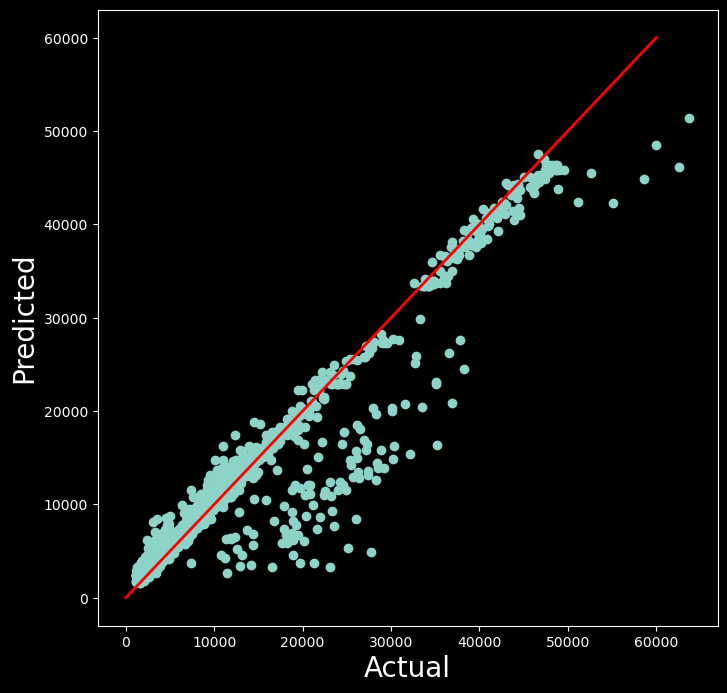

In [11]:
# Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

plt.scatter(y, y_pred)
plt.plot([0, 60000], [0, 60000], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted', size=20)
plt.xlabel('Actual', size=20)

plt.savefig('../../../figures/regression_evaluation.png', dpi=200, bbox_inches='tight')

## SHAP values

In [12]:
# Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

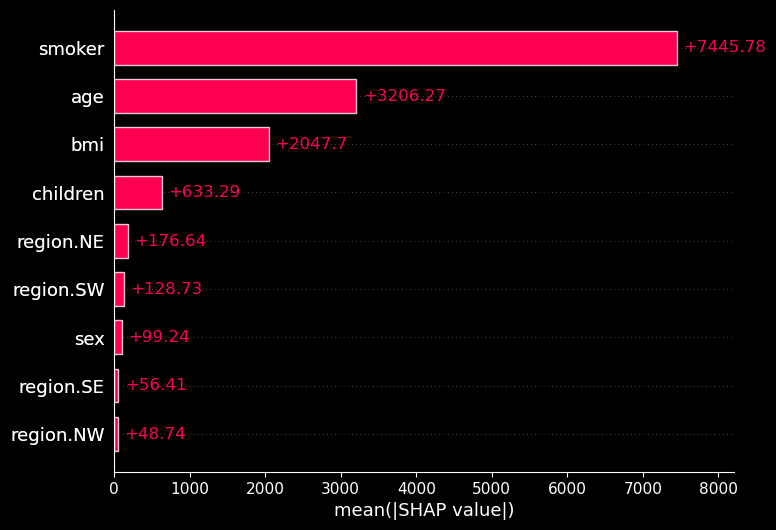

In [13]:
# Mean SHAP
shap.plots.bar(shap_values, show=False)
plt.savefig('../../../figures/mean_shap.png', dpi=200, bbox_inches='tight')

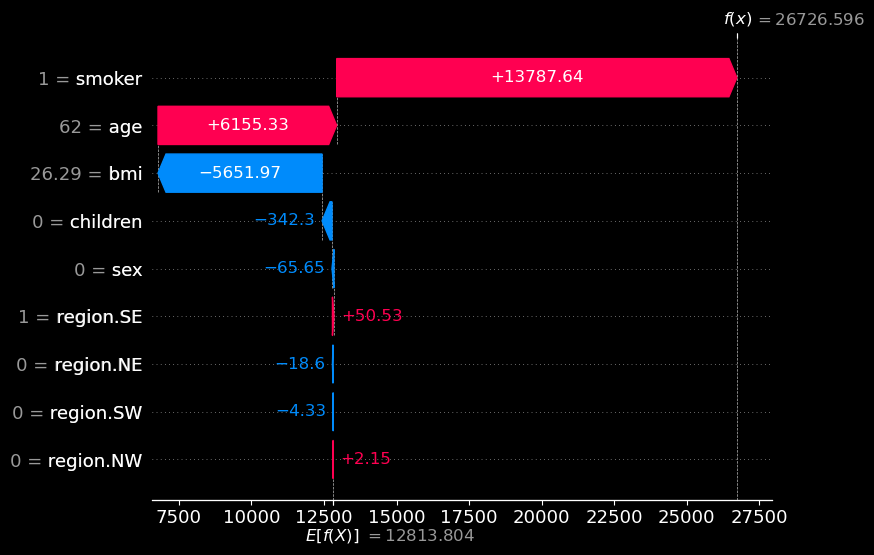

<Figure size 640x480 with 0 Axes>

In [14]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[11])
plt.savefig('../../../figures/shap_1.png', dpi=200, bbox_inches='tight')

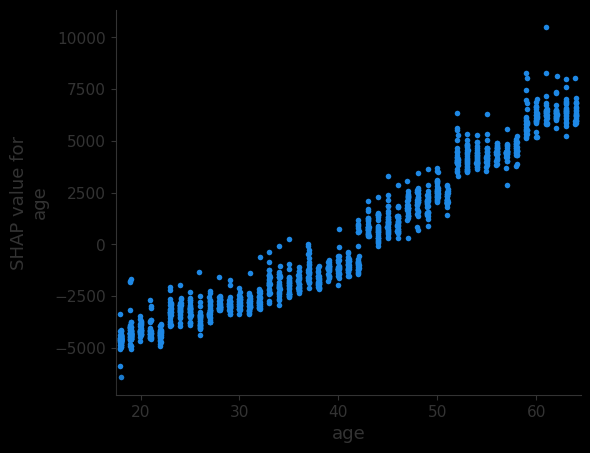

In [15]:
# SHAP scatter plot
shap.plots.scatter(shap_values[:, 'age'], show=False)
plt.savefig('../../../figures/age_scatter.png', dpi=200, bbox_inches='tight')

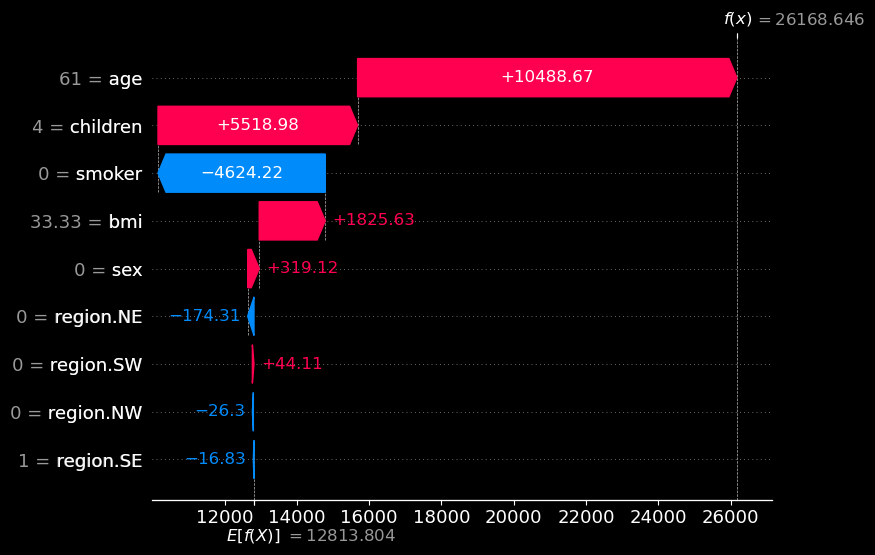

In [16]:
# Waterfall plot for second observation
shap.plots.waterfall(shap_values[1012])